# **Imports**

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
warnings.filterwarnings('ignore')

# **Reading** **Data**

In [140]:
path = '/content/anxiety_depression_data.csv'

In [141]:
df = pd.read_csv(path)

# **Understanding Data**

In [142]:
df.shape

(1200, 21)

In [143]:
df.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


In [144]:
df.describe()

,Age,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Therapy,Meditation,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
count,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000
mean,46.317500,6.46900,2.005750,5.055000,10.470000,10.674167,5.000833,0.318333,0.26750,0.210000,0.399167,4.992500,4.889167,5.062500,5.12000,4.959167
std,16.451157,1.52955,2.037818,2.652893,5.911138,5.632889,2.538281,0.466024,0.44284,0.407478,0.489931,2.590953,2.547016,2.531587,2.56991,2.566383
min,18.000000,2.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,33.000000,5.40000,0.600000,3.000000,5.000000,6.000000,3.000000,0.000000,0.00000,0.000000,0.000000,3.000000,3.000000,3.000000,3.00000,3.000000
50%,46.000000,6.40000,1.400000,5.000000,10.500000,11.000000,5.000000,0.000000,0.00000,0.000000,0.000000,5.000000,5.000000,5.000000,5.00000,5.000000
75%,61.000000,7.50000,2.700000,7.000000,16.000000,15.000000,7.000000,1.000000,1.00000,0.000000,1.000000,7.000000,7.000000,7.000000,7.00000,7.000000
max,74.000000,12.40000,15.100000,9.000000,20.000000,20.000000,9.000000,1.000000,1.00000,1.000000,1.000000,9.000000,9.000000,9.000000,9.00000,9.000000


In [145]:
df.describe(include='object')

,Gender,Education_Level,Employment_Status,Medication_Use,Substance_Use
count,1200,1200,1200,453,366
unique,4,5,4,2,2
top,Female,PhD,Employed,Regular,Occasional
freq,569,262,320,238,242


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  Medication_Use                 453 non-null    o

# **Checking Missing Values**

<Axes: >

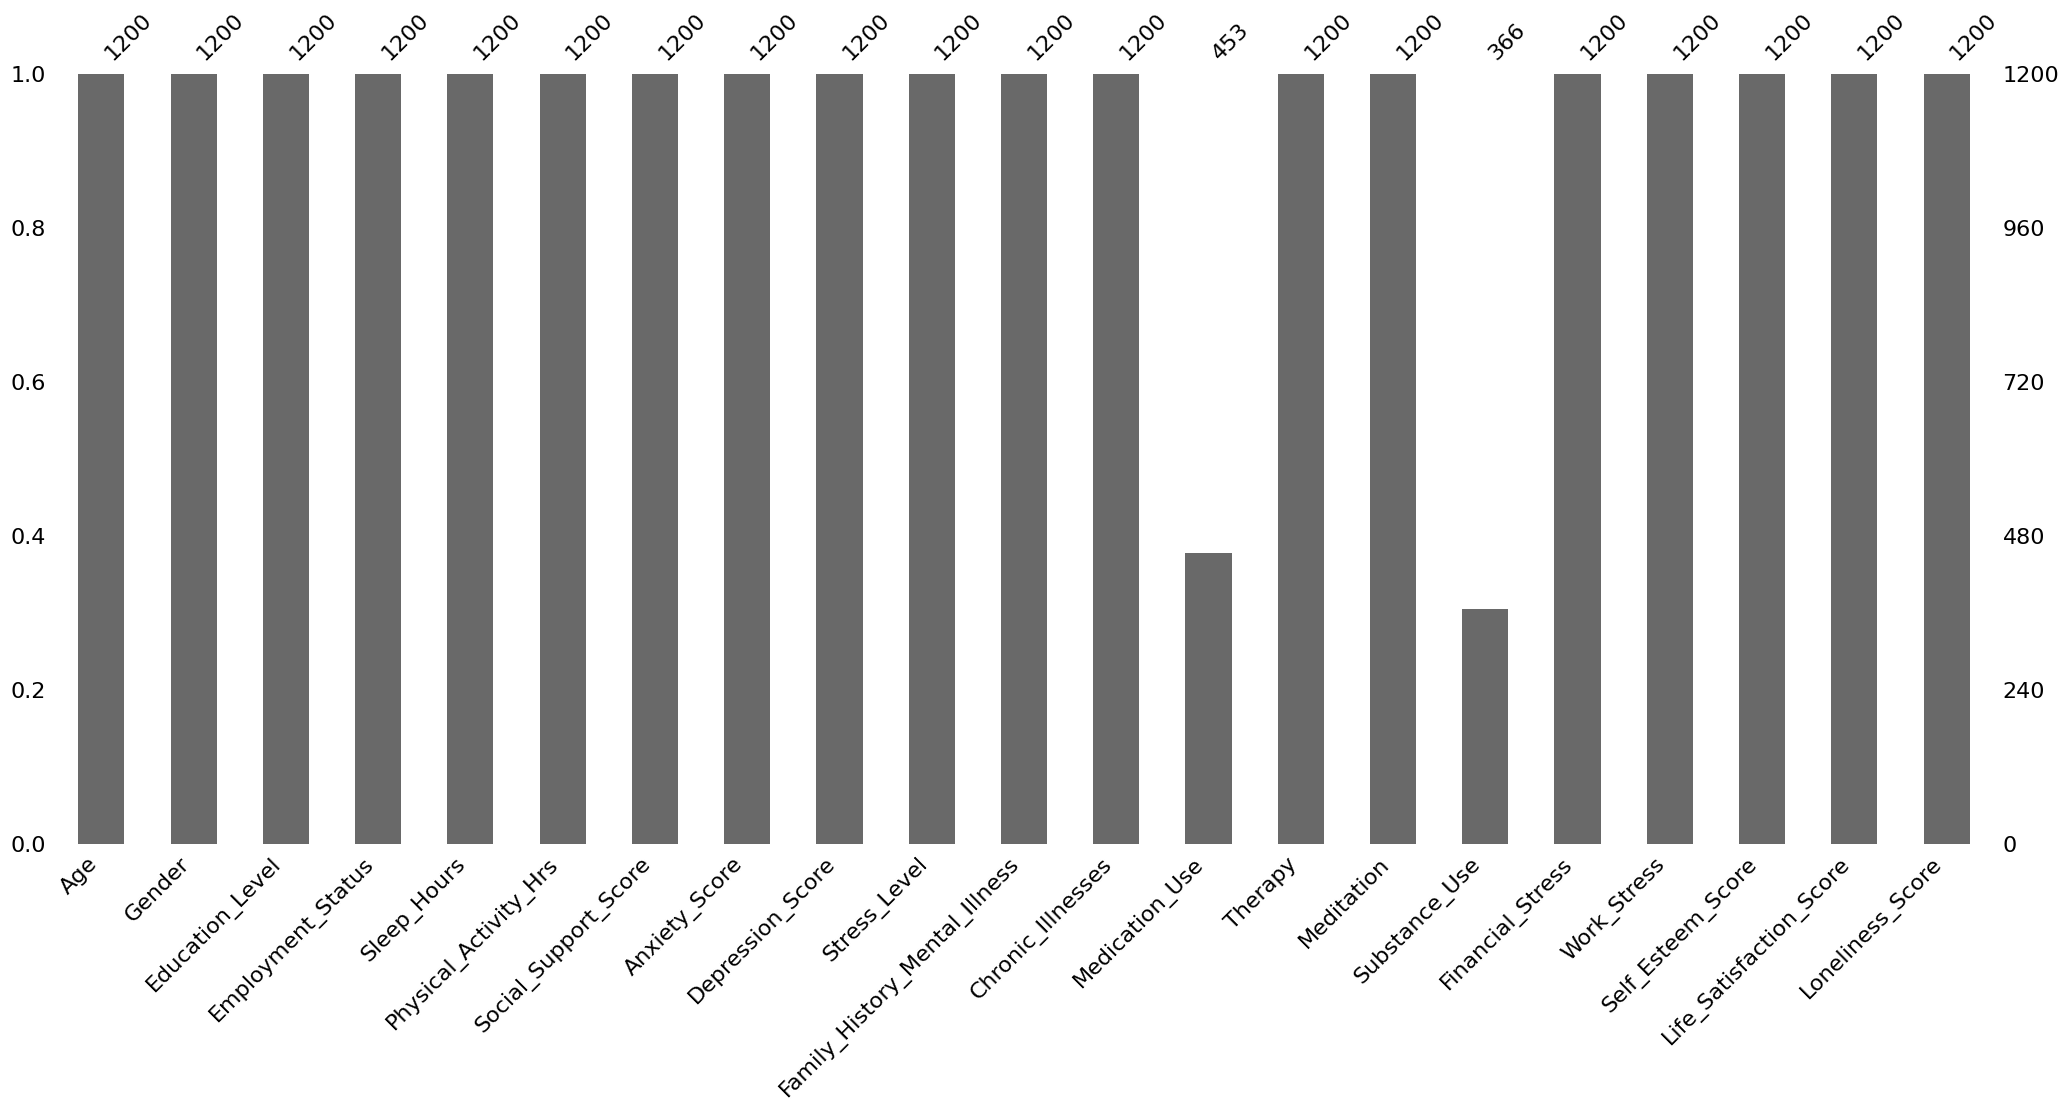

In [147]:
msno.bar(df)

In [148]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
Age,Age,0.00
Gender,Gender,0.00
Education_Level,Education_Level,0.00
Employment_Status,Employment_Status,0.00
Sleep_Hours,Sleep_Hours,0.00
Physical_Activity_Hrs,Physical_Activity_Hrs,0.00
Social_Support_Score,Social_Support_Score,0.00
Anxiety_Score,Anxiety_Score,0.00
Depression_Score,Depression_Score,0.00
Stress_Level,Stress_Level,0.00


# **Dropping Columns With More Than 60% Missing Values**

In [149]:
df['Medication_Use'].unique()

array([nan, 'Occasional', 'Regular'], dtype=object)

In [150]:
df['Substance_Use'].unique()

array([nan, 'Frequent', 'Occasional'], dtype=object)

In [151]:
df.drop(['Substance_Use', 'Medication_Use'], axis=1, inplace=True)

# **How is the data distributed ?**

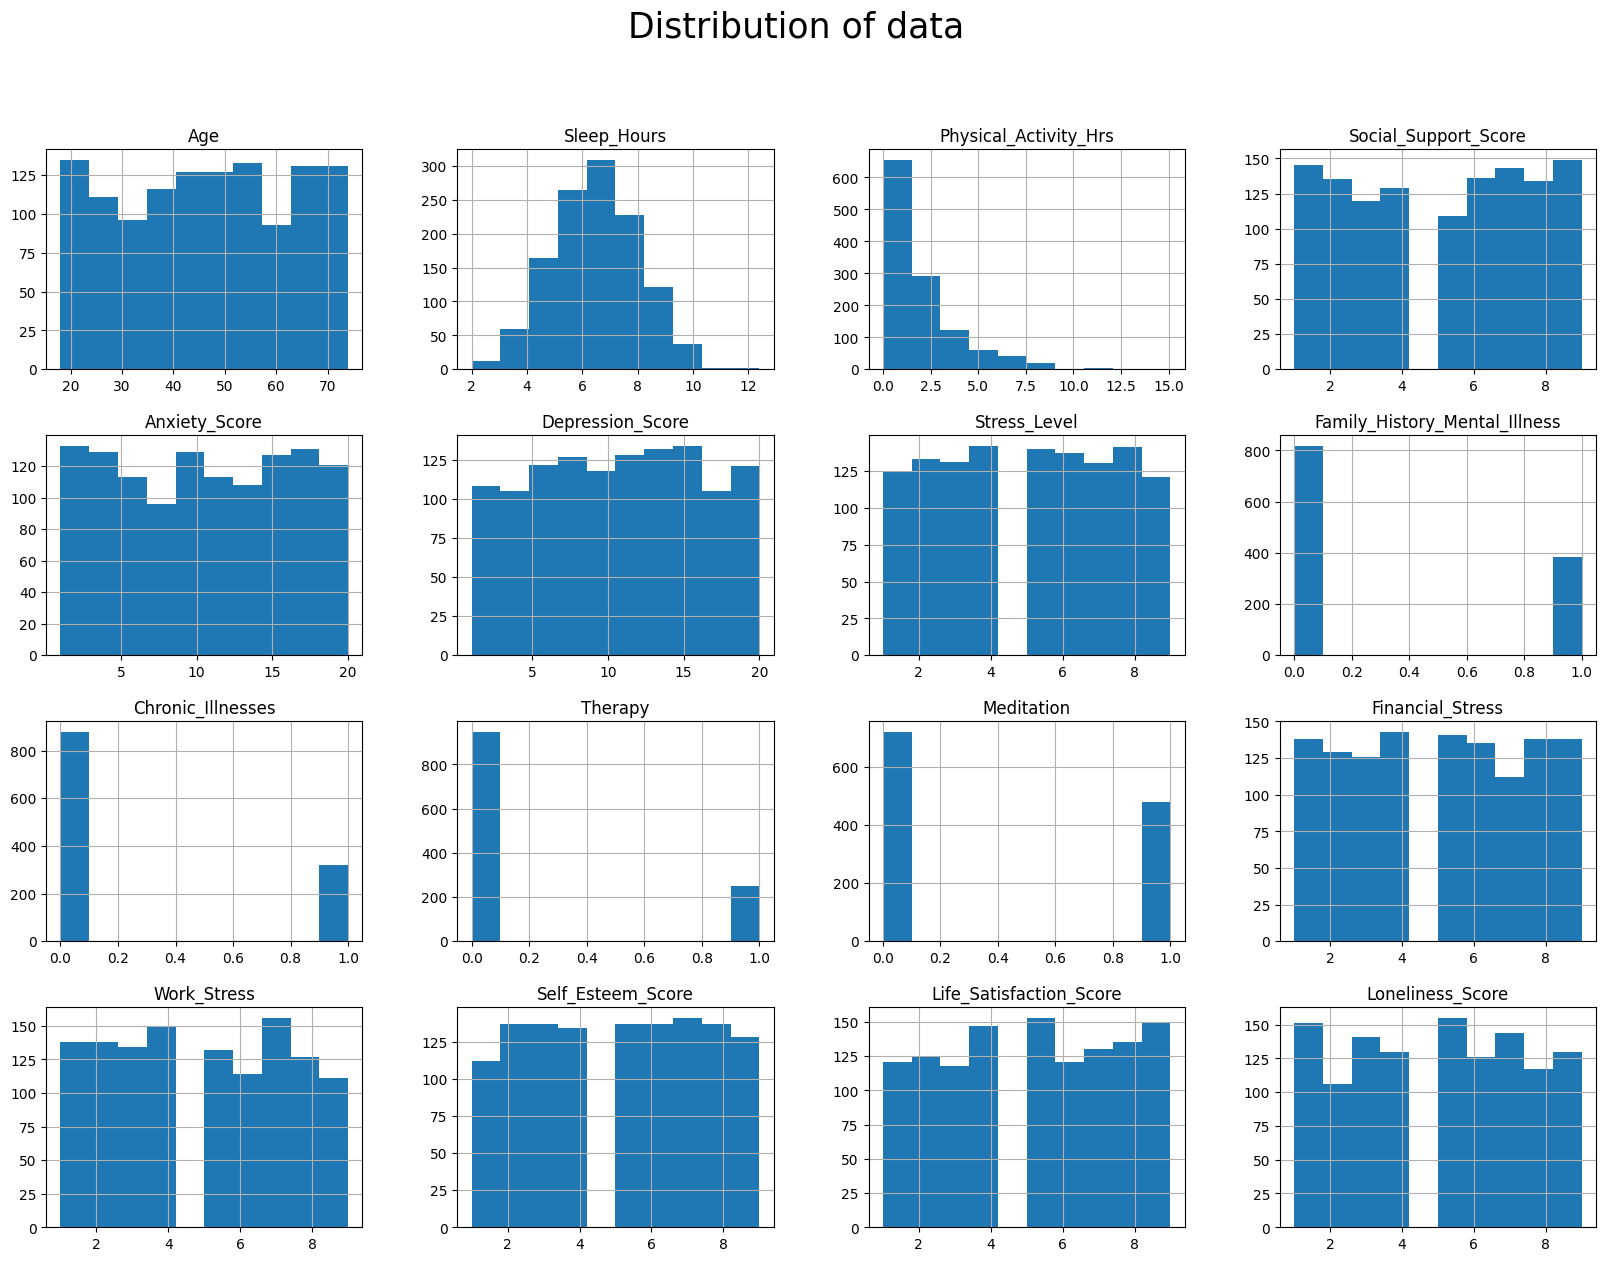

In [152]:
df.hist(figsize=(20, 14), grid=True)
plt.suptitle('Distribution of data', fontsize=25)
plt.show()

# Fixing Binary Columns

In [153]:
df['Meditation'].unique()

array([1, 0])

In [154]:
df['Chronic_Illnesses'].unique()

array([0, 1])

In [155]:
df['Therapy'].unique()

array([0, 1])

In [156]:
df['Family_History_Mental_Illness'].unique()

array([0, 1])

In [157]:
cols = ['Meditation', 'Therapy', 'Chronic_Illnesses','Family_History_Mental_Illness']
df[cols] = df[cols].replace({0: 'No', 1: 'Yes'})

# **Splitting Numerical and Categorical Columns**

In [158]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_categorical = df.select_dtypes(include=['object'])

print(f"Numerical columns: {list(df_numerical.columns)}")
print(f"Categorical columns: {list(df_categorical.columns)}")

Numerical columns: ['Age', 'Sleep_Hours', 'Physical_Activity_Hrs', 'Social_Support_Score', 'Anxiety_Score', 'Depression_Score', 'Stress_Level', 'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score', 'Life_Satisfaction_Score', 'Loneliness_Score']
Categorical columns: ['Gender', 'Education_Level', 'Employment_Status', 'Family_History_Mental_Illness', 'Chronic_Illnesses', 'Therapy', 'Meditation']


# **Checking for duplicated Rows**

In [159]:
df.duplicated().sum()

np.int64(0)

# **Check Outliers**

In [160]:
def check_outliers(df, columns):
    """Simple outlier detection using IQR method"""

    for col in columns:
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        print(f"\n{col}:")
        print(f"  Normal range: {lower_bound:.2f} to {upper_bound:.2f}")
        print(f"  Number of outliers: {len(outliers)}")
        print(f"  Outlier percentage: {len(outliers)/len(df)*100:.1f}%")

        if len(outliers) > 0:
            print(f"  Outlier values: {sorted(outliers[col].values)}")


Age:
  Normal range: -9.00 to 103.00
  Number of outliers: 0
  Outlier percentage: 0.0%

Sleep_Hours:
  Normal range: 2.25 to 10.65
  Number of outliers: 6
  Outlier percentage: 0.5%
  Outlier values: [np.float64(2.0), np.float64(2.1), np.float64(2.1), np.float64(10.8), np.float64(11.4), np.float64(12.4)]

Physical_Activity_Hrs:
  Normal range: -2.55 to 5.85
  Number of outliers: 75
  Outlier percentage: 6.2%
  Outlier values: [np.float64(5.9), np.float64(5.9), np.float64(5.9), np.float64(6.0), np.float64(6.0), np.float64(6.1), np.float64(6.1), np.float64(6.1), np.float64(6.1), np.float64(6.2), np.float64(6.3), np.float64(6.3), np.float64(6.3), np.float64(6.4), np.float64(6.4), np.float64(6.5), np.float64(6.5), np.float64(6.5), np.float64(6.6), np.float64(6.6), np.float64(6.6), np.float64(6.7), np.float64(6.7), np.float64(6.7), np.float64(6.7), np.float64(6.8), np.float64(6.8), np.float64(6.8), np.float64(6.8), np.float64(6.8), np.float64(6.8), np.float64(6.8), np.float64(6.8), np.flo

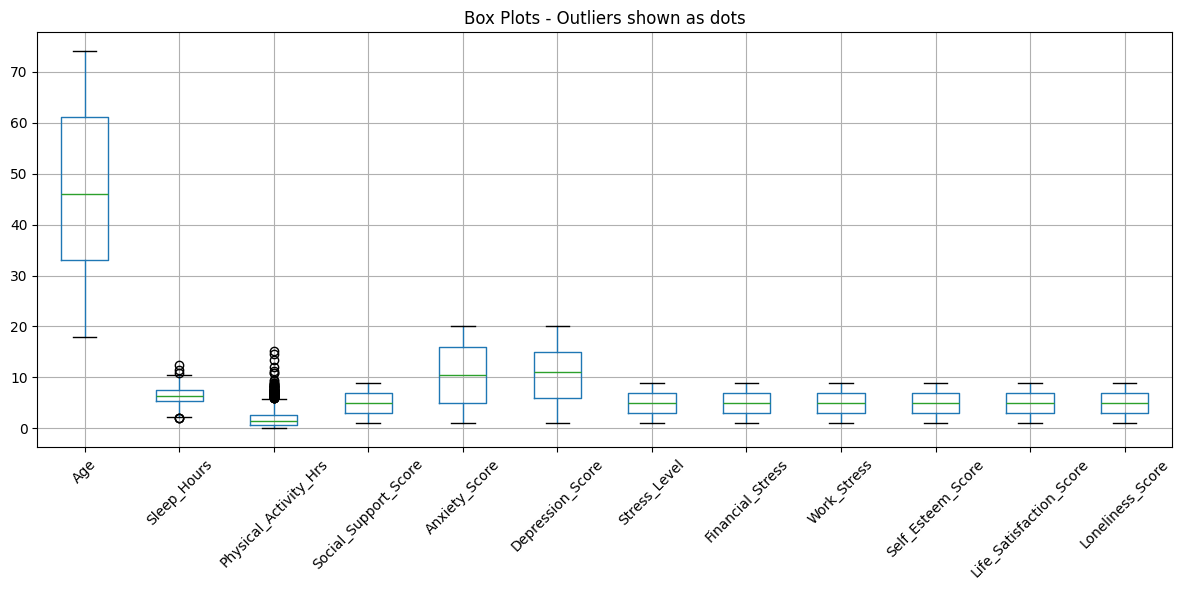

In [161]:
check_outliers(df, df_numerical.columns)

df_numerical.boxplot(figsize=(12, 6))
plt.title('Box Plots - Outliers shown as dots')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Fix Outliers**

In [162]:
def treat_outliers_iqr(df, column_name):

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_before = len(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)])
    print(f"Outliers before treatment: {outliers_before}")

    df[column_name] = df[column_name].clip(lower=lower_bound, upper=upper_bound)

    outliers_after = len(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)])
    print(f"Outliers after treatment: {outliers_after}")
    print(f"New range: {df[column_name].min():.2f} to {df[column_name].max():.2f}")

    return df

print("=" * 50)
df = treat_outliers_iqr(df, 'Physical_Activity_Hrs')

print("\n" + "=" * 50)
df = treat_outliers_iqr(df, 'Sleep_Hours')

Outliers before treatment: 75
Outliers after treatment: 0
New range: 0.00 to 5.85

Outliers before treatment: 6
Outliers after treatment: 0
New range: 2.25 to 10.65



Age:
  Normal range: -9.00 to 103.00
  Number of outliers: 0
  Outlier percentage: 0.0%

Sleep_Hours:
  Normal range: 2.25 to 10.65
  Number of outliers: 0
  Outlier percentage: 0.0%

Physical_Activity_Hrs:
  Normal range: -2.55 to 5.85
  Number of outliers: 0
  Outlier percentage: 0.0%

Social_Support_Score:
  Normal range: -3.00 to 13.00
  Number of outliers: 0
  Outlier percentage: 0.0%

Anxiety_Score:
  Normal range: -11.50 to 32.50
  Number of outliers: 0
  Outlier percentage: 0.0%

Depression_Score:
  Normal range: -7.50 to 28.50
  Number of outliers: 0
  Outlier percentage: 0.0%

Stress_Level:
  Normal range: -3.00 to 13.00
  Number of outliers: 0
  Outlier percentage: 0.0%

Financial_Stress:
  Normal range: -3.00 to 13.00
  Number of outliers: 0
  Outlier percentage: 0.0%

Work_Stress:
  Normal range: -3.00 to 13.00
  Number of outliers: 0
  Outlier percentage: 0.0%

Self_Esteem_Score:
  Normal range: -3.00 to 13.00
  Number of outliers: 0
  Outlier percentage: 0.0%

Life_Sati

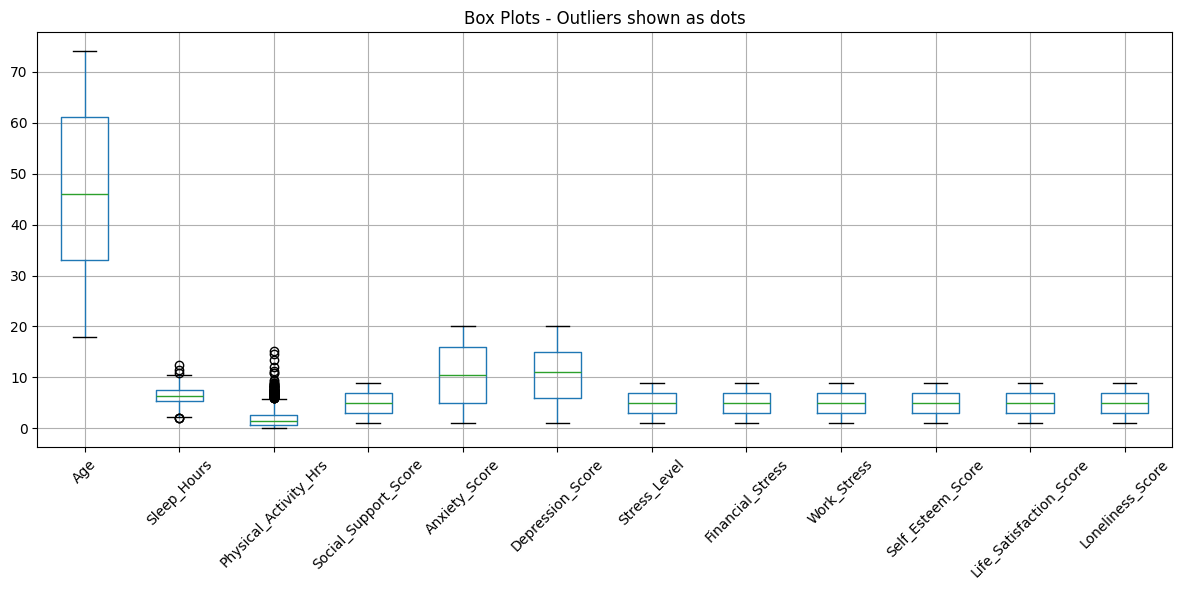

In [163]:
check_outliers(df, df_numerical.columns)

df_numerical.boxplot(figsize=(12, 6))
plt.title('Box Plots - Outliers shown as dots')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Checking All The Values For Each Column**

In [164]:
for col in df.columns:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Values: {list(df[col].unique())}")

print("\n" + "="*50)


Age:
  Unique values: 57
  Values: [np.int64(56), np.int64(69), np.int64(46), np.int64(32), np.int64(60), np.int64(25), np.int64(38), np.int64(36), np.int64(40), np.int64(28), np.int64(41), np.int64(70), np.int64(53), np.int64(57), np.int64(20), np.int64(39), np.int64(19), np.int64(61), np.int64(47), np.int64(55), np.int64(50), np.int64(29), np.int64(42), np.int64(66), np.int64(44), np.int64(59), np.int64(45), np.int64(33), np.int64(64), np.int64(68), np.int64(72), np.int64(74), np.int64(54), np.int64(24), np.int64(26), np.int64(35), np.int64(21), np.int64(31), np.int64(67), np.int64(43), np.int64(37), np.int64(52), np.int64(34), np.int64(23), np.int64(71), np.int64(51), np.int64(27), np.int64(48), np.int64(65), np.int64(62), np.int64(58), np.int64(18), np.int64(22), np.int64(30), np.int64(49), np.int64(73), np.int64(63)]

Gender:
  Unique values: 4
  Values: ['Male', 'Female', 'Non-Binary', 'Other']

Education_Level:
  Unique values: 5
  Values: ["Bachelor's", "Master's", 'High Schoo

# **Fix Some Mistakes In Gender**

In [165]:
mode_gender = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].replace(['Other', 'Non-Binary'], mode_gender)

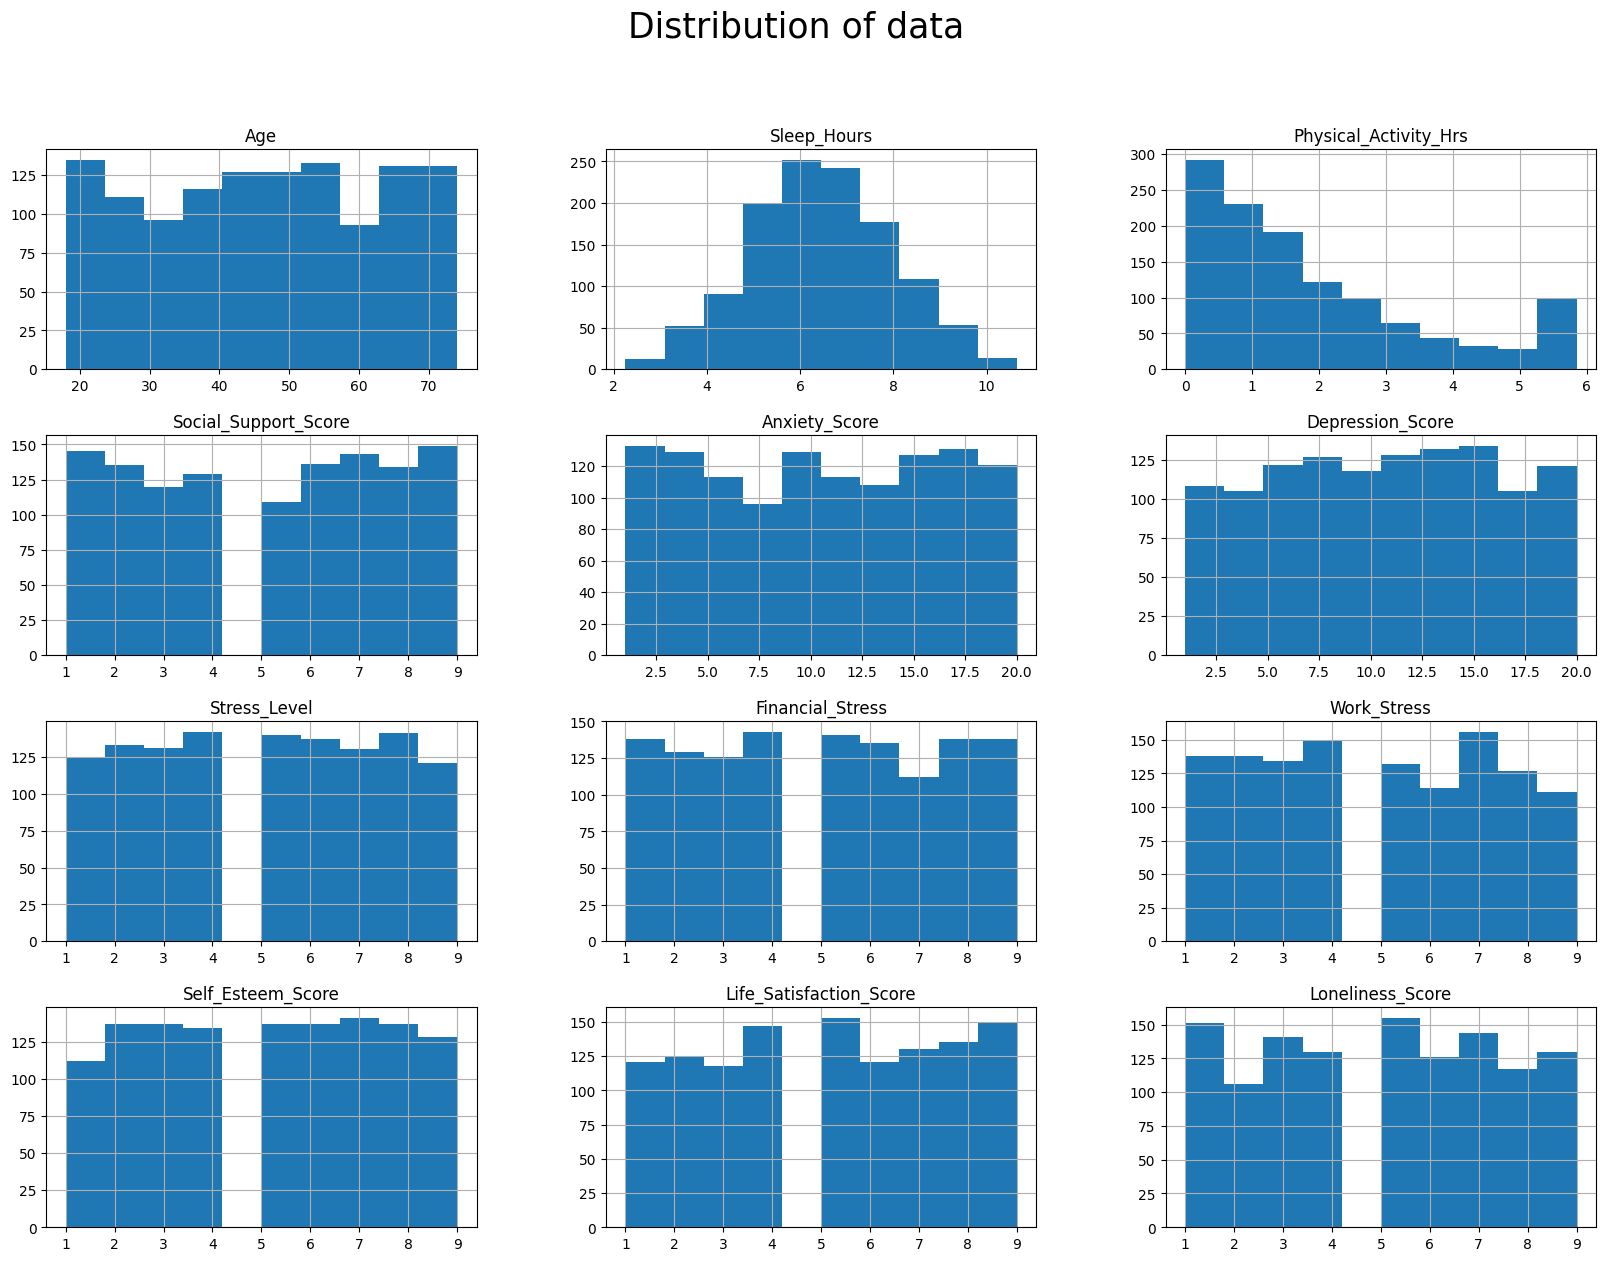

In [166]:
df.hist(figsize=(20, 14), grid=True)
plt.suptitle('Distribution of data', fontsize=25)
plt.show()

# **Check For Skewness**

In [167]:
print("SKEWNESS CHECK:")
print("="*40)

for col in df_numerical:
    skewness = df[col].skew()

    if abs(skewness) < 0.5:
        status = "✅ Normal"
    elif abs(skewness) < 1.0:
        status = "⚠️  Moderate"
    else:
        status = "❌ High - needs fix"

    print(f"{col}: {skewness:.2f} {status}")


SKEWNESS CHECK:
Age: -0.04 ✅ Normal
Sleep_Hours: -0.01 ✅ Normal
Physical_Activity_Hrs: 1.05 ❌ High - needs fix
Social_Support_Score: -0.04 ✅ Normal
Anxiety_Score: -0.03 ✅ Normal
Depression_Score: -0.05 ✅ Normal
Stress_Level: -0.00 ✅ Normal
Financial_Stress: 0.01 ✅ Normal
Work_Stress: 0.04 ✅ Normal
Self_Esteem_Score: -0.02 ✅ Normal
Life_Satisfaction_Score: -0.03 ✅ Normal
Loneliness_Score: -0.00 ✅ Normal


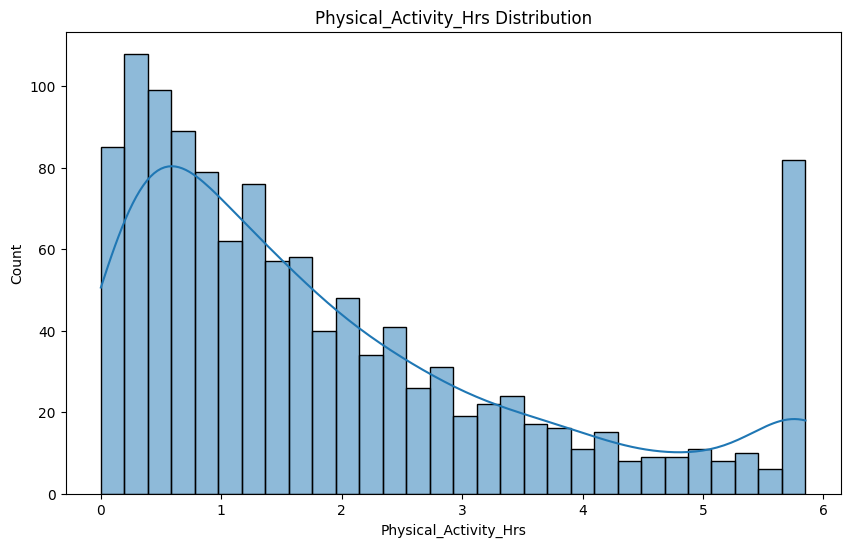

In [168]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Physical_Activity_Hrs'], bins=30, kde=True)
plt.title('Physical_Activity_Hrs Distribution')
plt.show()

# **Fix The Skewness**

In [169]:
df['Physical_Activity_Hrs'] = np.log1p(df['Physical_Activity_Hrs'])

In [170]:
print("SKEWNESS CHECK:")
print("="*40)

for col in df_numerical:
    skewness = df[col].skew()

    if abs(skewness) < 0.5:
        status = "✅ Normal"
    elif abs(skewness) < 1.0:
        status = "⚠️  Moderate"
    else:
        status = "❌ High - needs fix"

    print(f"{col}: {skewness:.2f} {status}")


SKEWNESS CHECK:
Age: -0.04 ✅ Normal
Sleep_Hours: -0.01 ✅ Normal
Physical_Activity_Hrs: 0.27 ✅ Normal
Social_Support_Score: -0.04 ✅ Normal
Anxiety_Score: -0.03 ✅ Normal
Depression_Score: -0.05 ✅ Normal
Stress_Level: -0.00 ✅ Normal
Financial_Stress: 0.01 ✅ Normal
Work_Stress: 0.04 ✅ Normal
Self_Esteem_Score: -0.02 ✅ Normal
Life_Satisfaction_Score: -0.03 ✅ Normal
Loneliness_Score: -0.00 ✅ Normal


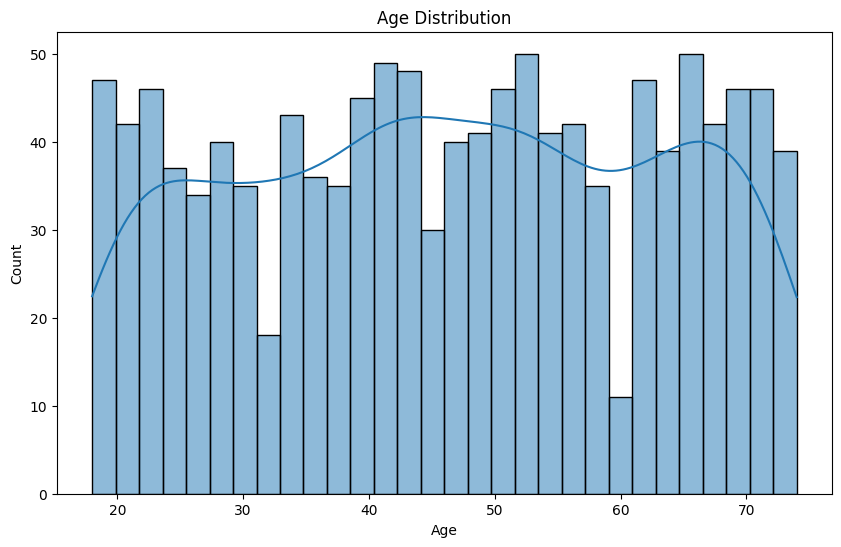

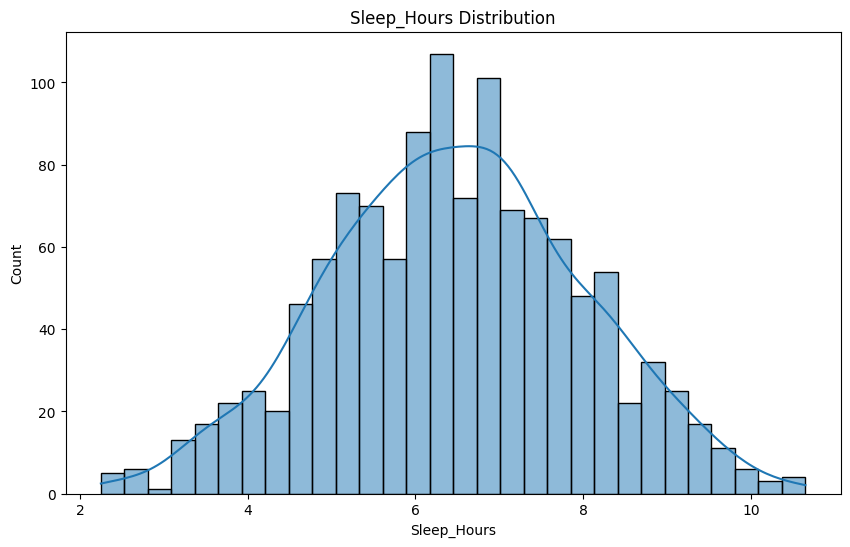

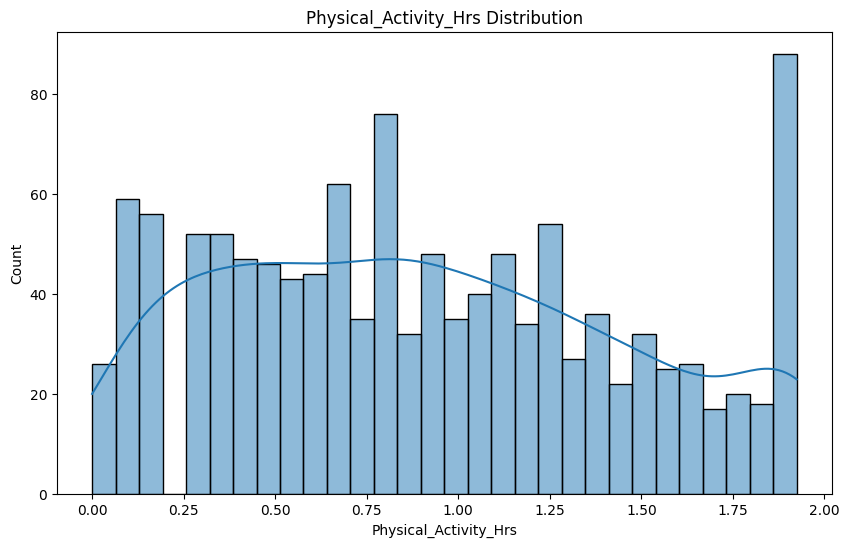

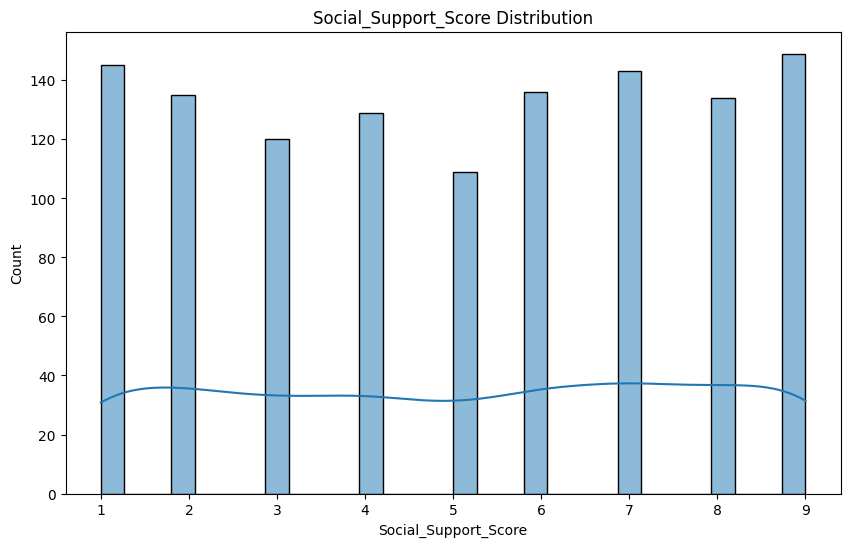

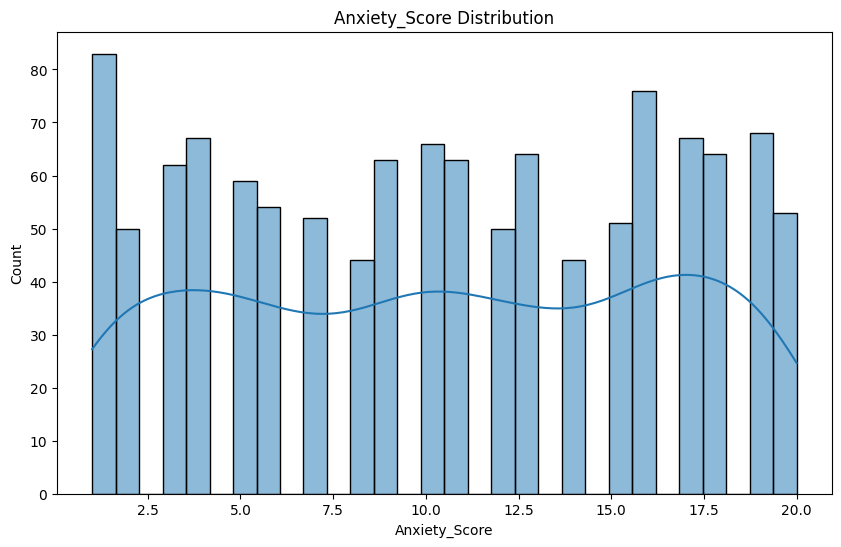

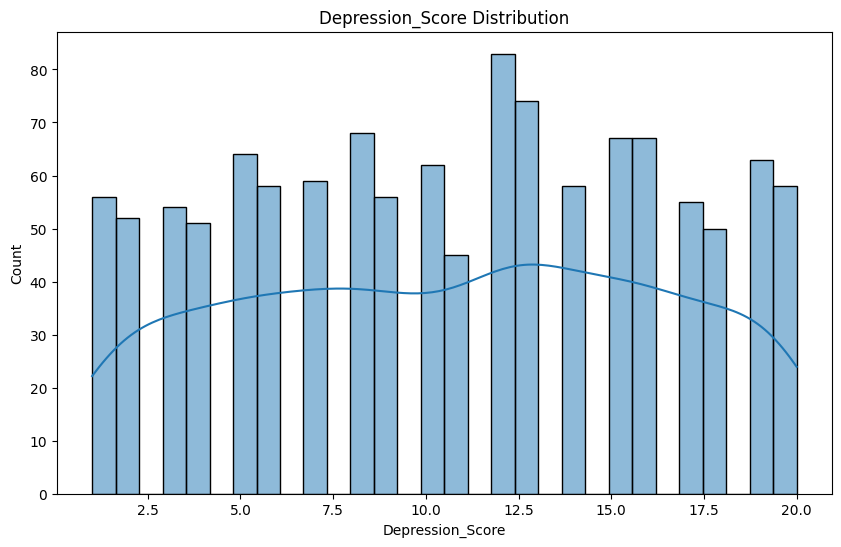

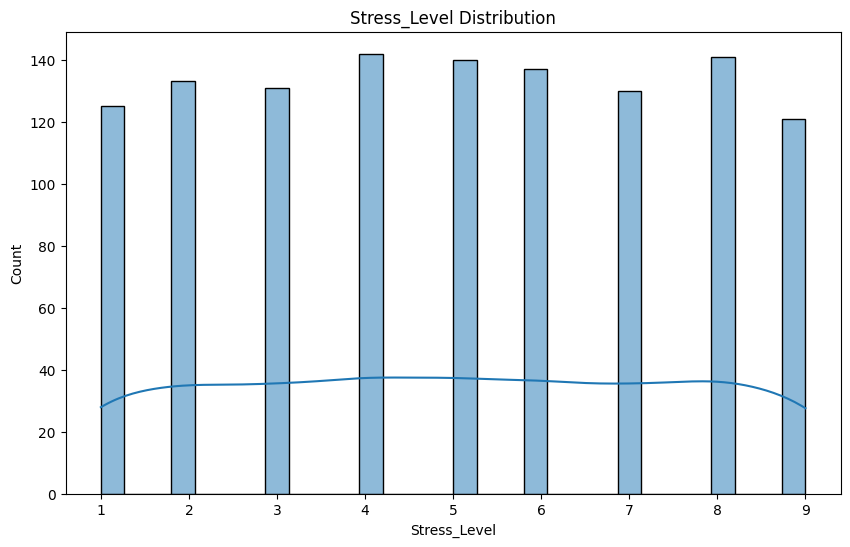

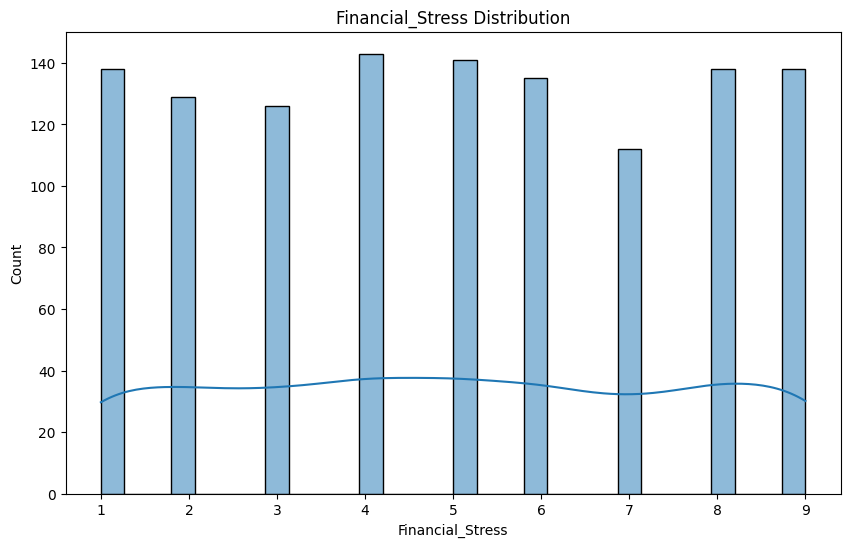

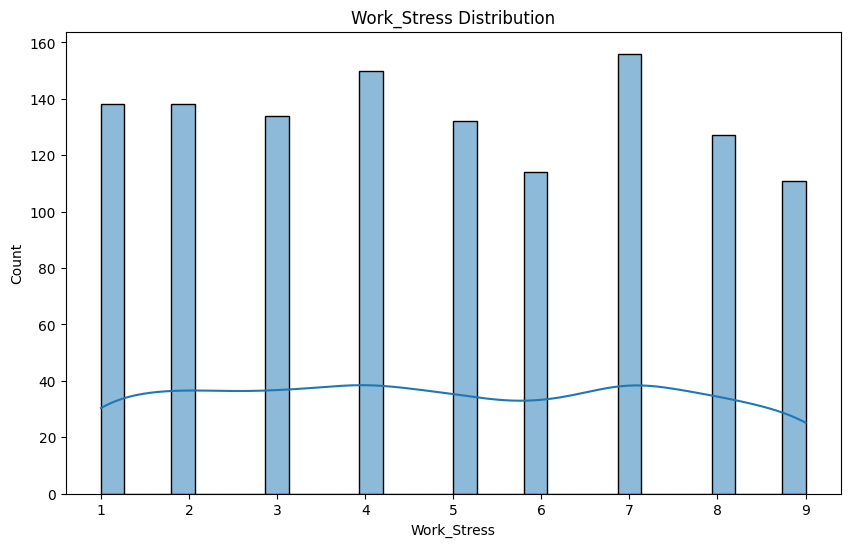

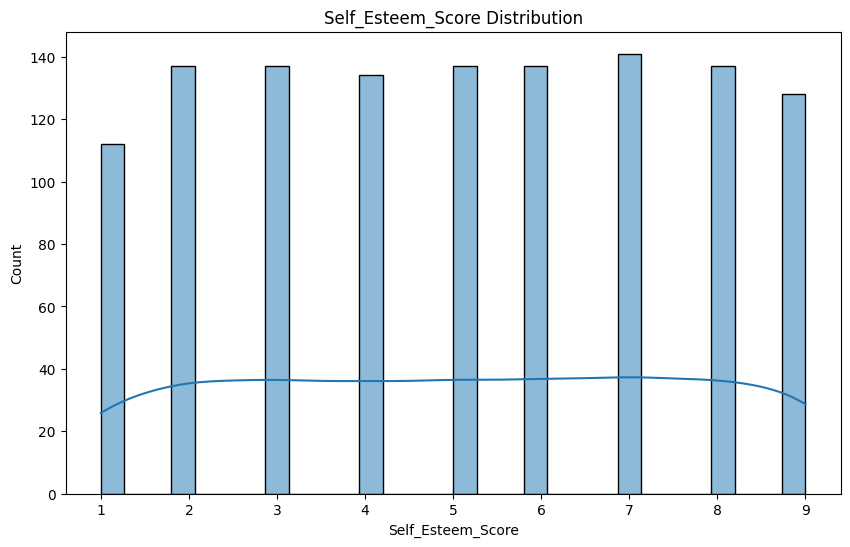

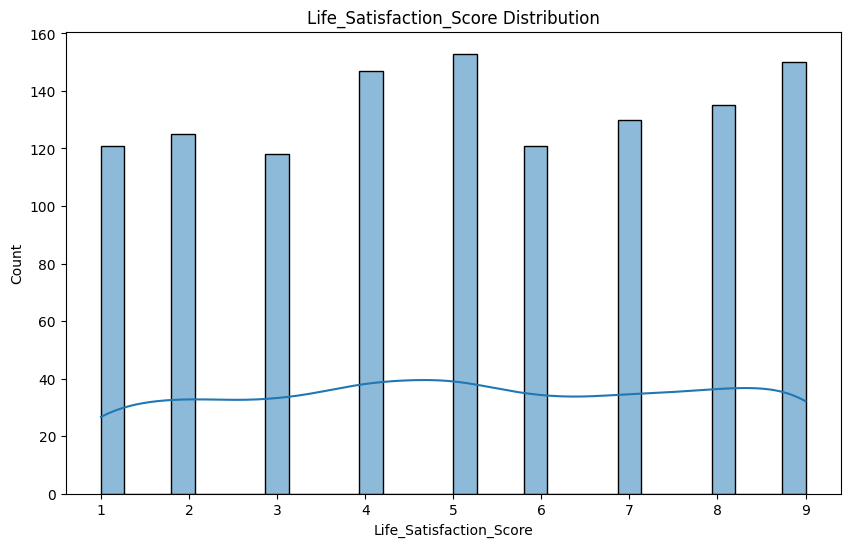

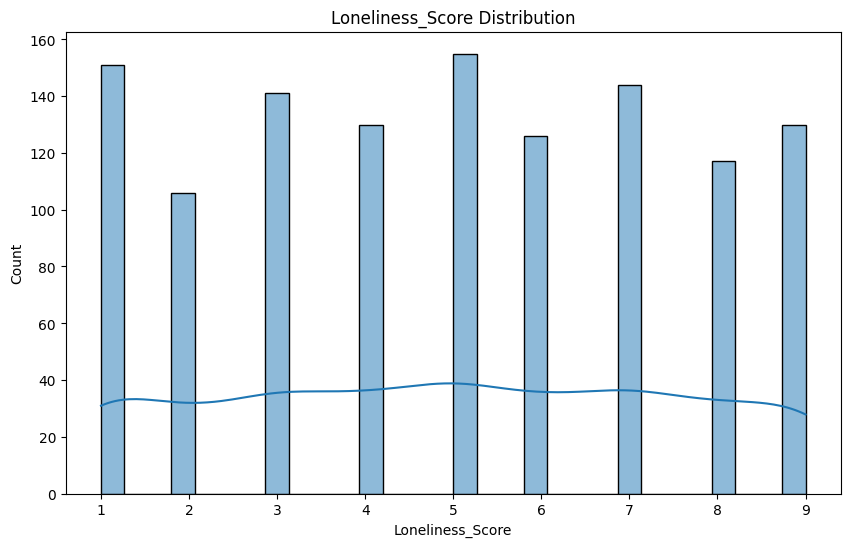

In [171]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'{col} Distribution')
    plt.show()

In [172]:
df.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Therapy,Meditation,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.336472,3,4,2,9,No,No,No,Yes,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,1.335001,6,18,7,6,No,No,Yes,No,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,0.955511,5,5,13,8,No,No,No,Yes,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.405465,4,6,3,4,Yes,Yes,No,No,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.530628,2,7,15,3,No,No,Yes,Yes,8,9,5,7,7


# **Check Correlation**

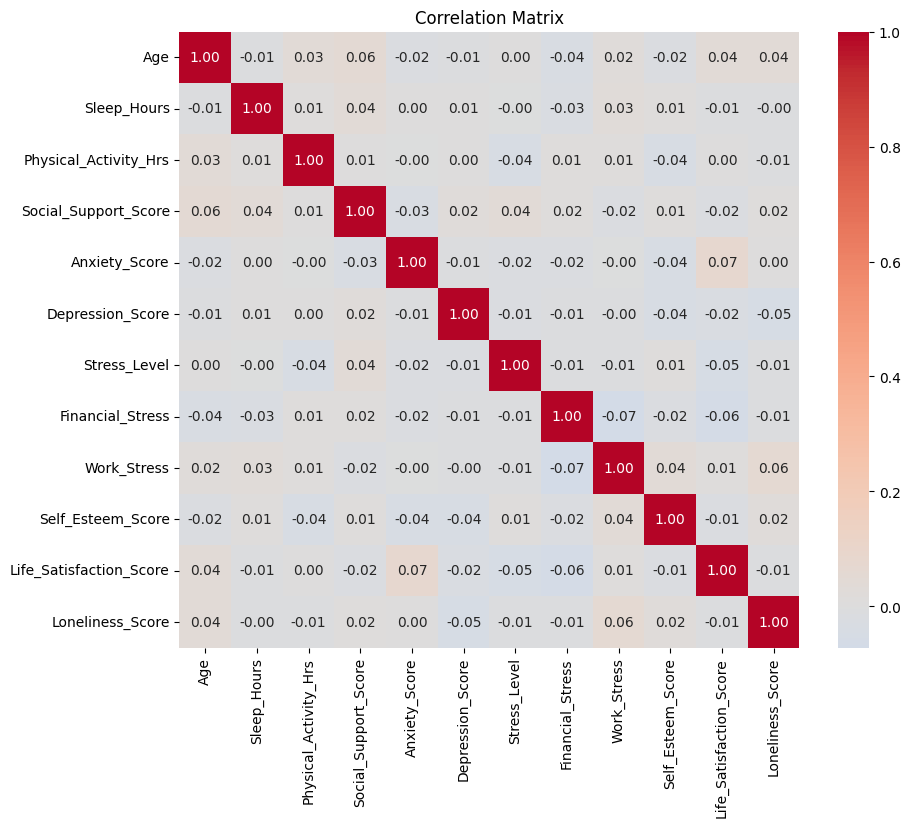

In [175]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# **Download The Cleaned File**

In [176]:
df.to_csv('cleaned_mental_health_data.csv', index=False)

# **Label Encoding and Normalization**

In [177]:
print("1. Label Encoding...")

for col in df_categorical:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"{col} encoded")

print("\n2. Standard Scaling...")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("All numerical columns scaled")

print(f"\nDone! Dataset ready for analysis.")
print(f"Shape: {df.shape}")

1. Label Encoding...
Gender encoded
Education_Level encoded
Employment_Status encoded
Family_History_Mental_Illness encoded
Chronic_Illnesses encoded
Therapy encoded
Meditation encoded

2. Standard Scaling...
All numerical columns scaled

Done! Dataset ready for analysis.
Shape: (1200, 19)


In [178]:
df.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Therapy,Meditation,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,0.588806,1.143544,-1.476188,1.360182,-0.307288,-1.037332,-0.774949,-1.095000,-1.540556,1.576198,-0.683369,-0.604308,-0.515580,1.226874,-0.383223,-0.742027,0.765649,-0.046714,-1.543346
1,1.379353,-0.874475,-1.476188,-0.419773,1.534137,0.779090,0.356363,1.274398,-0.652542,0.393803,-0.683369,-0.604308,1.939563,-0.815080,-1.541581,-0.349247,0.765649,-0.435995,0.405733
2,-0.019308,-0.874475,-0.055638,-1.309750,-0.767644,0.088761,-0.020741,-0.925758,0.413075,1.182067,-0.683369,-0.604308,-0.515580,1.226874,1.161254,0.829093,1.160823,-1.603837,-1.543346
3,-0.870666,-0.874475,-0.765913,1.360182,1.534137,-0.911827,-0.397845,-0.756515,-1.362954,-0.394460,1.463339,1.654786,-0.515580,-0.815080,0.775134,-0.349247,1.160823,-0.435995,-0.373898
4,0.832051,-0.874475,-1.476188,-0.419773,0.481894,-0.684143,-1.152053,-0.587272,0.768280,-0.788592,-0.683369,-0.604308,1.939563,1.226874,1.161254,1.614653,-0.024698,0.731848,0.795549
